<a href="https://colab.research.google.com/github/chsachin799/100-days-of-ML/blob/main/62_Ridge_Regression_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
data = load_diabetes()

In [6]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
x = data.data
y = data.target

In [9]:
print(x)
print("--------------------------------------------------------------------------")
print(y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
--------------------------------------------------------------------------
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 1

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(x_test)

In [18]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 Score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score: 0.4526027629719195
RMSE: 53.85344583676593


In [29]:
from sklearn.linear_model import Ridge
R = Ridge(alpha = 0.0001) # its basically lambda

In [21]:
R.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [22]:
y_pred1 = R.predict(x_test)

In [23]:
print("R2 Score:",r2_score(y_test,y_pred1))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 Score: 0.4526998154220112
RMSE: 53.84867157029345


/tmp/ipython-input-2707882131.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


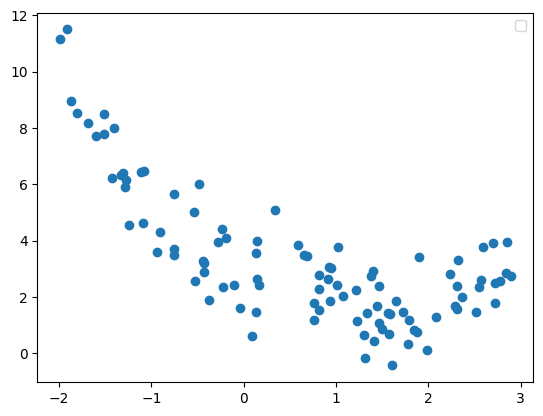

In [27]:

m = 100
x1 = 5 * np.random.rand(m,1) - 2
x2 = 0.7 * x1**2 - 2 * x1 + 3 + np.random.randn(m,1)
plt.scatter(x1,x2)
plt.legend()
plt.show()

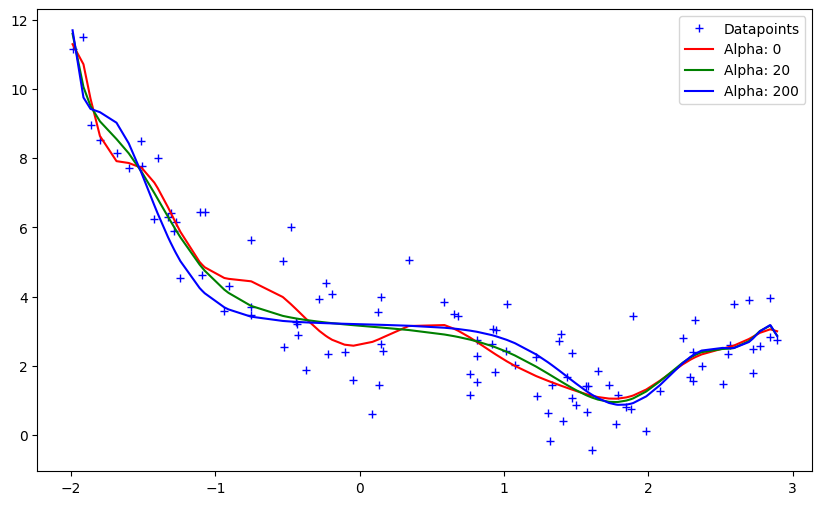

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
  model = Pipeline([
      ('poly_feats',PolynomialFeatures(degree=16)),
      ('ridge',Ridge(alpha=alpha))
  ])
  model.fit(x1,x2)
  return model.predict(x1)

alphas = [0,20,200]
cs = ['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha, c in zip(alphas,cs):
  preds = get_preds_ridge(x1,x2,alpha)
  plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()